# Chapter 1 Exercises

:::{exercise}
:label: ch1-ex1

Solve the following IVP using the Euler method with a step length of $h=0.5$. Write down your solutions correct to 4 decimal places.
\begin{align*}
    y' + y = 1 - e^{-t}  \qquad t\in [0,4],\qquad y(0)=1.
\end{align*}

:::

:::{solution} ch1-ex1
:class: dropdown

Rearranging the ODE slightly gives $y' = 1 - y -e^{-t}$. The values of $t_n$ are


$$ \mathbf{t} = \begin{pmatrix} 0.0 \\ 0.5 \\ 1.0 \\ 1.5 \\ 2.0 \\ 2.5 \\ 3.0 \\ 3.5 \\ 4.0 \end{pmatrix}, $$

and applying the Euler method with step length $h=0.5$ gives

$$ \begin{align*}
    y_0 &= 1, \\
    y_1 &= y_0 + h (1 - y_0 - e^{-t_0}) \\
    &= 1.0 + 0.5 (1 - 1.0 - e^{-0.0}) = 0.5, \\
    y_2 &= y_1 + h (1 - y_1 - e^{-t_1}) \\
    &= 0.5 + 0.5 (1 - 0.5 - e^{-0.5}) = 0.446735, \\
    y_3 &= y_2 + h (1 - y_2 - e^{-t_2}) \\
    &= 0.446735 + 0.5 (1 - 0.446735 - e^{-1.0}) = 0.539428, \\
    y_4 &= y_3 + h (1 - y_3 - e^{-t_3}) \\
    &= 0.539428 + 0.5 (1 - 0.539428 - e^{-1.5}) = 0.658149, \\
    y_5 &= y_4 + h (1 - y_4 - e^{-t_4}) \\
    &= 0.658149 + 0.5 (1 - 0.658149 - e^{-2.0}) = 0.761407, \\
    y_6 &= y_5 + h (1 - y_5 - e^{-t_5}) \\
    &= 0.761407 + 0.5 (1 - 0.761407 - e^{-2.5}) = 0.839661, \\
    y_7 &= y_6 + h (1 - y_6 - e^{-t_6}) \\
    &= 0.839661 + 0.5 (1 - 0.839661 - e^{-3.0}) = 0.894937, \\
    y_8 &= y_7 + h (1 - y_7 - e^{-t_7}) \\
    &= 0.894937 + 0.5 (1 - 0.894937 - e^{-3.5}) = 0.93237, \\
\end{align*} $$
:::

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
plt.rcParams['text.usetex'] = True  # use LaTeX commands in plot

def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    print(r"$$ \begin{align*}")
    print(rf"    y_0 &= {y0[0]}, \\")
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
        print(rf"    y_{n+1} &= y_{n} + h (1 - y_{n} - e^{{-t_{n}}}) \\")
        print(rf"    &= {y[n,0]:0.6} + {h} (1 - {y[n,0]:0.6} - e^{{-{t[n]}}}) = {y[n+1,0]:0.6}, \\")
              
    print(r"\end{align*} $$")
    return t, y


def euler(f, t, y, h): 
    return y + h * f(t, y)


def f(t,y):
    return 1 - y - np.exp(-t)


# Define IVP parameters
tspan = [0, 4]   # boundaries of the t domain
y0 =  [1]        # initial value
h = 0.5          # step length

# Solve the IVP using the Euler method
t, y = solveIVP(f, tspan, y0, h, euler)

$$ \begin{align*}
    y_0 &= 1, \\
    y_1 &= y_0 + h (1 - y_0 - e^{-t_0}) \\
    &= 1.0 + 0.5 (1 - 1.0 - e^{-0.0}) = 0.5, \\
    y_2 &= y_1 + h (1 - y_1 - e^{-t_1}) \\
    &= 0.5 + 0.5 (1 - 0.5 - e^{-0.5}) = 0.446735, \\
    y_3 &= y_2 + h (1 - y_2 - e^{-t_2}) \\
    &= 0.446735 + 0.5 (1 - 0.446735 - e^{-1.0}) = 0.539428, \\
    y_4 &= y_3 + h (1 - y_3 - e^{-t_3}) \\
    &= 0.539428 + 0.5 (1 - 0.539428 - e^{-1.5}) = 0.658149, \\
    y_5 &= y_4 + h (1 - y_4 - e^{-t_4}) \\
    &= 0.658149 + 0.5 (1 - 0.658149 - e^{-2.0}) = 0.761407, \\
    y_6 &= y_5 + h (1 - y_5 - e^{-t_5}) \\
    &= 0.761407 + 0.5 (1 - 0.761407 - e^{-2.5}) = 0.839661, \\
    y_7 &= y_6 + h (1 - y_6 - e^{-t_6}) \\
    &= 0.839661 + 0.5 (1 - 0.839661 - e^{-3.0}) = 0.894937, \\
    y_8 &= y_7 + h (1 - y_7 - e^{-t_7}) \\
    &= 0.894937 + 0.5 (1 - 0.894937 - e^{-3.5}) = 0.93237, \\
\end{align*} $$


:::{exercise}
:label: ch1-ex2

The exact solution to the IVP from exercise 1 is $y =1 - te^{-t}$. Write a Python or MATLAB program to compute the solution to this IVP and calculate the absolute error for each value. Present your results in the form of a table and a plot of the numerical and exact solutions.
:::

::::::{solution} ch1-ex2
:class: dropdown

Table

:::
|  t   |   Euler  |   Exact  |  Error   |
|:----:|:--------:|:--------:|:--------:|
| 0.00 | 1.000000 | 1.000000 | 0.00e+00 |
| 0.50 | 0.500000 | 0.696735 | 1.97e-01 |
| 1.00 | 0.446735 | 0.632121 | 1.85e-01 |
| 1.50 | 0.539428 | 0.665305 | 1.26e-01 |
| 2.00 | 0.658149 | 0.729329 | 7.12e-02 |
| 2.50 | 0.761407 | 0.794788 | 3.34e-02 |
| 3.00 | 0.839661 | 0.850639 | 1.10e-02 |
| 3.50 | 0.894937 | 0.894309 | 6.28e-04 |
| 4.00 | 0.932370 | 0.926737 | 5.63e-03 |
:::

Plot

:::{glue:figure} ch1-ex2-plot
:figwidth: 600
:::

Code 

:::::{tab-set} 

::::{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # use LaTeX commands in plot


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def euler(f, t, y, h): 
    return y + h * f(t, y)


def f(t,y):
    return 1 - y - np.exp(-t)


def exact(t):
    return 1 - t * np.exp(-t)


# Define IVP parameters
tspan = [0, 4]   # boundaries of the t domain
y0 =  [1]        # initial value
h = 0.5          # step length

# Solve the IVP using the Euler method
t, y = solveIVP(f, tspan, y0, h, euler)

# Print table of solution values
print("|  t   |   Euler  |   Exact  |  Error   |")
print("|:----:|:--------:|:--------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:0.2f} | {y[n,0]:0.6f} | {exact(t[n]):0.6f} | {abs(y[n,0] - exact(t[n])):0.2e} |")

# Calculate exact solution
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)

# Plot solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k-', label='Exact')
plt.plot(t, y[:,0], "b-o", label='Euler')
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
```
::::

::::{tab-item} MATLAB

```matlab
% Define ODE function and exact solution
f = @(t,y) 1 - y - exp(-t);
exact = @(t) 1 - t .* exp(-t);

% Define IVP parameters
tspan = [0, 4];
y0 = 1;
h = 0.5;

% Solve the IVP using the Euler method
[t, y] = solveIVP(f, tspan, y0, h, @euler);

% Print table of solution values
for i = 1:1
    fprintf("|  t   |   Euler   |   Exact   |  Error   |")
    fprintf("|:----:|:---------:|:---------:|:--------:|")
    for n = 1 : length(t)
        fprintf("| %1.2f | %9.6f | %9.6f | %1.2e |\n", t(n), y(n), exact(t(n)), abs(y(n) - exact(t(n))));
    end
end
% Calculate exact solution (for plotting)
texact = linspace(tspan(1), tspan(2), 200);
yexact = exact(texact);

% Plot solution
plot(texact, yexact, 'k-', LineWidth=1)
hold on
plot(t, y, 'b-o', LineWidth=1, MarkerFaceColor='b')
hold off
axis padded
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', 'Euler', fontsize=12)

% --------------------------------------------------------
function [t, y] = solveIVP(f, tspan, y0, h, solver)

% Define t and y arrays
t = (tspan(1) : h : tspan(2));
y = zeros(length(t), length(y0));
y(1,:) = y0;

% Loop through the steps and calculate single step solver solution
for n = 1 : length(t) - 1
    y(n+1,:) = solver(f, t(n), y(n,:), h);
end

end

% --------------------------------------------------------
function y = euler(f, t, y, h)

y = y + h * f(t, y);

end
```

::::
:::::
::::::

|  t   |   Euler  |   Exact  |  Error   |
|:----:|:--------:|:--------:|:--------:|
| 0.00 | 1.000000 | 1.000000 | 0.00e+00 |
| 0.50 | 0.500000 | 0.696735 | 1.97e-01 |
| 1.00 | 0.446735 | 0.632121 | 1.85e-01 |
| 1.50 | 0.539428 | 0.665305 | 1.26e-01 |
| 2.00 | 0.658149 | 0.729329 | 7.12e-02 |
| 2.50 | 0.761407 | 0.794788 | 3.34e-02 |
| 3.00 | 0.839661 | 0.850639 | 1.10e-02 |
| 3.50 | 0.894937 | 0.894309 | 6.28e-04 |
| 4.00 | 0.932370 | 0.926737 | 5.63e-03 |


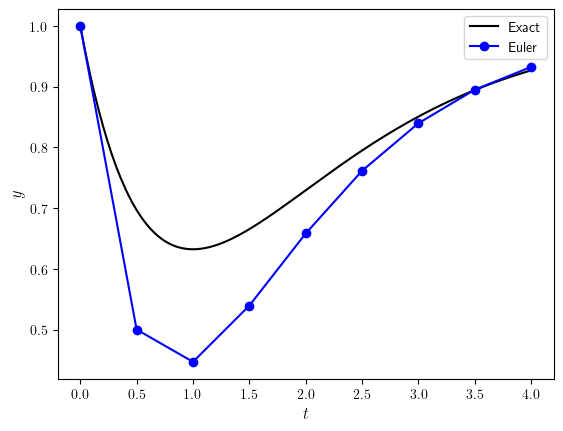

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
plt.rcParams['text.usetex'] = True  # use LaTeX commands in plot

def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def euler(f, t, y, h): 
    return y + h * f(t, y)


def f(t,y):
    return 1 - y - np.exp(-t)


def exact(t):
    return 1 - t * np.exp(-t)


# Define IVP parameters
tspan = [0, 4]   # boundaries of the t domain
y0 =  [1]        # initial value
h = 0.5          # step length

# Solve the IVP using the Euler method
t, y = solveIVP(f, tspan, y0, h, euler)

# Print table of solution values
print("|  t   |   Euler  |   Exact  |  Error   |")
print("|:----:|:--------:|:--------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:0.2f} | {y[n,0]:0.6f} | {exact(t[n]):0.6f} | {abs(y[n,0] - exact(t[n])):0.2e} |")

# Calculate exact solution
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)

# Plot solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k-', label='Exact')
plt.plot(t, y[:,0], "b-o", label='Euler')
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()

glue('ch1-ex2-plot', fig, display=False)


:::{exercise}
:label: ch1-ex3

Repeat exercise 2 using values of $h = 0.4, 0.2, 0.1, 0.05$ to solve the IVP. 

(a) Produce a plot of the numerical solutions on the same axes. 

(b) Calculate the global truncation error for $y(1)$ and present your results as a table and a plot of the global truncation error against the step length $h$. (Hint: you can use the NumPy command `idx = np.argmin(abs(t - t0))` or the MATLAB command `[~,idx] = min(abs(t - t0))` to determine the index of the value in the array `t` which is closest to `t0`).

(c) Comment on your results. What do they tell you about the Euler method?


:::

::::::{solution} ch1-ex3
:class: dropdown

(a) 

:::{glue:figure} ch1-ex3a-plot
:figwidth: 600
:::

:::::{tab-set}
::::{tab-item} Python

```python
# Plot the exact solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k-', label='Exact')

# Loop through h values and calculate the solutions
hvals = [0.5, 0.25, 0.125, 0.0625]
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    plt.plot(t, y, '.-', label=f"$h = {h:0.3f}$")

plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
```
::::

::::{tab-item} MATLAB
```matlab
% Plot the exact solution
plot(texact, yexact, 'k', LineWidth=1)
hold on
 
% Loop through h values and calculate the solutions
hvals = [0.5, 0.25, 0.125, 0.0625];
for h = hvals
    [t, y] = solveIVP(f, tspan, y0, h, @euler);
    plot(t, y, 'o-')
end
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', '$h=0.5$', '$h=0.25$', '$h=0.125$', '$h=0.0625$', ...
    Location='southeast', FontSize=12, Interpreter='latex')
hold off
```
::::
:::::

(b) Exact solution: $y(1) = 1 - e^{-1} = 0.632121$

Table

:::
|   h   |   Euler   |  Error   |
|:-----:|:---------:|:--------:|
| 0.500 |  0.446735 | 1.85e-01 |
| 0.250 |  0.553196 | 7.89e-02 |
| 0.125 |  0.595324 | 3.68e-02 |
| 0.062 |  0.614319 | 1.78e-02 |
:::

Plot

:::{glue:figure} ch1-ex3b-plot
:figwidth: 600
:::

:::::{tab-set}
::::{tab-item} Python

```python
errors = []
print(f"Exact solution: y(1) = {exact(1):0.6f}\n")
print("|   h   |   Euler   |  Error   |")
print("|:-----:|:---------:|:--------:|")
for h in hvals:
    t, y = ivp_solver(f, tspan, y0, h, euler)
    idx = np.argmin(abs(t - 1))
    errors.append(abs(y[idx,0] - exact(1)))
    print(f"| {h:0.3f} | {y[idx,0]:9.6f} | {errors[-1]:0.2e} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, 'b-o')
plt.xlabel('$h$', fontsize=14)
plt.ylabel('GTE at $y(1)$', fontsize=14)
plt.show()
```
::::

::::{tab-item} MATLAB

```matlab
for i = 1 : 1
    errors = [];
    fprintf("Exact solution: y(1) = %1.6f\n", exact(1))
    fprintf("|   h   |  Euler   |  Error   |")
    fprintf("|:-----:|:--------:|:--------:|")
    for h = hvals
        [t, y] = solveIVP(f, tspan, y0, h, @euler);
        [~, idx] = min(abs(t - 1));
        errors = [errors, abs(y(idx,1) - exact(1))];
        fprintf("| %1.2f | %9.6f | %1.2e |\n", h, y(idx), errors(end))
    end
end

% Plot errors
plot(hvals, errors, 'b-o', LineWidth=2, MarkerFaceColor='b')
axis padded
xlabel('$h$', FontSize=14, Interpreter='latex')
ylabel('GTE at $y(1)$', FontSize=14, Interpreter='latex')
```

::::
:::::

(c) The plot of the global truncation error for $y(1)$ shows that the errors tend to zero as $h$ decreases in a roughly linear fashion indicating that the Euler method is first-order accurate.

::::::

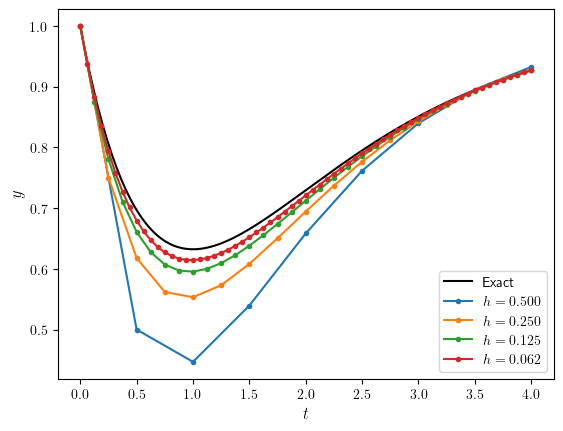

Exact solution: y(1) = 0.632121

|   h   |   Euler   |  Error   |
|:-----:|:---------:|:--------:|
| 0.500 |  0.446735 | 1.85e-01 |
| 0.250 |  0.553196 | 7.89e-02 |
| 0.125 |  0.595324 | 3.68e-02 |
| 0.062 |  0.614319 | 1.78e-02 |


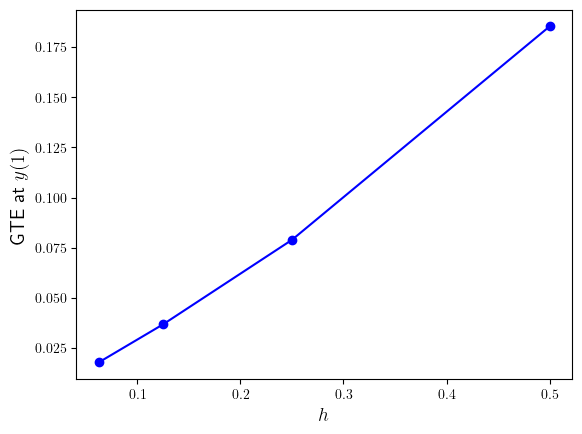

In [3]:
# Plot the exact solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k-', label='Exact')

# Loop through h values and calculate the solutions
hvals = [0.5, 0.25, 0.125, 0.0625]
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    plt.plot(t, y, '.-', label=f"$h = {h:0.3f}$")

plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
glue('ch1-ex3a-plot', fig, display=False)

# Loop through h values and calculate errors
errors = []
print(f"Exact solution: y(1) = {exact(1):0.6f}\n")
print("|   h   |   Euler   |  Error   |")
print("|:-----:|:---------:|:--------:|")
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    idx = np.argmin(abs(t - 1))
    errors.append(abs(y[idx,0] - exact(1)))
    print(f"| {h:0.3f} | {y[idx,0]:9.6f} | {errors[-1]:0.2e} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, 'b-o')
plt.xlabel('$h$', fontsize=14)
plt.ylabel('GTE at $y(1)$', fontsize=14)
plt.show()

glue('ch1-ex3b-plot', fig, display=False)

::::{exercise}
:label: ch1-ex4

The motion of a pendulum can be modelled by the following ODE

$$ \begin{align*}
    \ddot{\theta} + \frac{g}{L} \sin(\theta) = 0,
\end{align*} $$

where $\theta$ is the angle between the pendulum and the vertical, $L$ is the length of the pendulum and $g=9.81\text{ms}^{-2}$ is the acceleration due to gravity.

:::{figure} /images/pendulum.svg
:width: 150
:::

Write a program that solves this IVP using the Euler method with $h=0.001$ over the interval $t\in [0, 5]$ for a pendulum of length $L = 1$ set at an initial angle $\theta = \frac{\pi}{2}$. Produce a plot of the displacement angle $\theta$ against $t$.

::::


::::::{solution} ch1-ex4
:class: dropdown

Let $y_1 = \theta$ and $y_2 = \dot{\theta}$ then we can write the ODE as

$$ \begin{align*}
    y_1' &= y_2, \\
    y_2' &= -\frac{g}{L} \sin(y_1), 
\end{align*} $$

so we have the IVP $\mathbf{y}' = \mathbf{f}(t, \mathbf{y})$ where

$$ \begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1  \\ y_2 \end{pmatrix}, &
    \mathbf{f}(t, \mathbf{y}) &= \begin{pmatrix} y_2 \\  -g \sin(y_1)/L \end{pmatrix}, &
    \mathbf{y}_0 &= \begin{pmatrix} \pi/2 \\  0 \end{pmatrix}.
\end{align*} $$

Plot

:::{glue:figure} ch1-ex4-plot
:figwidth: 600
:::

Code

:::::{tab-set}
::::{tab-item} Python

```python
# Define ODE function
def f(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


# Define IVP
tspan = [0, 5]
y0 = [np.pi / 2, 0]
h = 0.001
g = 9.81             # acceleration due to gravity
L = 1                # pendulum length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, euler)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$\\theta$", fontsize=14)
```
::::

::::{tab-item} MATLAB

```matlab
% Define ODE
f = @(t, y) [y(2), -9.81 * sin(y(1))];

% Define IVP
tspan = [0, 5];
y0 = [pi / 2, 0];
h = 0.001;
g = 9.81;
L = 1;

% Solve IVP
[t, y] = solveIVP(f, tspan, y0, h, @euler);

% Plot solution
plot(t, y(:, 1), "b-", LineWidth=2, MarkerFaceColor="b")
xlabel("$t$", FontSize=16, Interpreter="latex")
ylabel("$\theta$", FontSize=16, Interpreter="latex")
```

::::
:::::
::::::

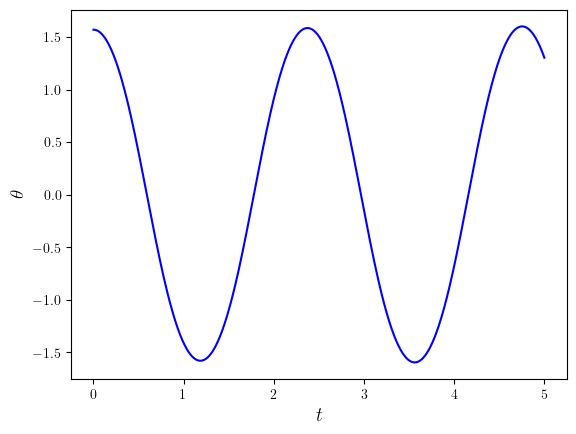

In [4]:
# Define ODE function
def f(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


# Define IVP
tspan = [0, 5]
y0 = [np.pi / 2, 0]
h = 0.001
g = 9.81             # acceleration due to gravity
L = 1                # pendulum length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, euler)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$\\theta$", fontsize=14)

glue('ch1-ex4-plot', fig, display=False)